In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import duckdb as db

In [3]:
con = db.connect("../cyberdeck.db") 
con.install_extension("spatial")
con.load_extension("spatial")

In [4]:
con.sql("show tables;")

┌────────────┐
│    name    │
│  varchar   │
├────────────┤
│ barometric │
│ cpu        │
│ gps        │
└────────────┘

# GPS Plotting
* GeoPandas to read geometry as longitude and latitude points **(lon_lat_geometry)**

In [5]:
qry_gps = con.sql("select datetime,longitude,longitude_direction,latitude,latitude_direction,ST_AsText(lon_lat_geometry) as lon_lat_geometry from gps  where longitude != 0 and latitude != 0;")
df_gps = qry_gps.df()
df_gps

,datetime,longitude,longitude_direction,latitude,latitude_direction,lon_lat_geometry
0,2025-09-20 15:09:21,-79.395455,W,43.657445,N,POINT (-79.395455 43.657445)
1,2025-09-20 15:09:37,-79.395457,W,43.657445,N,POINT (-79.39545666666666 43.657445)
2,2025-09-20 15:09:58,-79.395457,W,43.657448,N,POINT (-79.39545666666666 43.657448333333335)
3,2025-09-20 15:10:21,-79.395460,W,43.657457,N,POINT (-79.39546 43.65745666666667)
4,2025-09-20 15:10:40,-79.395463,W,43.657463,N,POINT (-79.39546333333334 43.65746333333333)
...,...,...,...,...,...,...
85,2025-09-20 15:47:11,-79.395170,W,43.661007,N,POINT (-79.39517 43.661006666666665)
86,2025-09-20 15:47:30,-79.395170,W,43.661007,N,POINT (-79.39517 43.661006666666665)
87,2025-09-20 15:47:43,-79.395170,W,43.661007,N,POINT (-79.39517 43.661006666666665)
88,2025-09-20 15:48:04,-79.395158,W,43.660992,N,POINT (-79.39515833333333 43.66099166666667)


In [6]:
df_gps["lon_lat_geometry"] = gpd.GeoSeries.from_wkt(df_gps["lon_lat_geometry"])
gdf_gps = gpd.GeoDataFrame(df_gps, geometry="lon_lat_geometry", crs="EPSG:4326")
gdf_gps

,datetime,longitude,longitude_direction,latitude,latitude_direction,lon_lat_geometry
0,2025-09-20 15:09:21,-79.395455,W,43.657445,N,POINT (-79.39546 43.65744)
1,2025-09-20 15:09:37,-79.395457,W,43.657445,N,POINT (-79.39546 43.65744)
2,2025-09-20 15:09:58,-79.395457,W,43.657448,N,POINT (-79.39546 43.65745)
3,2025-09-20 15:10:21,-79.395460,W,43.657457,N,POINT (-79.39546 43.65746)
4,2025-09-20 15:10:40,-79.395463,W,43.657463,N,POINT (-79.39546 43.65746)
...,...,...,...,...,...,...
85,2025-09-20 15:47:11,-79.395170,W,43.661007,N,POINT (-79.39517 43.66101)
86,2025-09-20 15:47:30,-79.395170,W,43.661007,N,POINT (-79.39517 43.66101)
87,2025-09-20 15:47:43,-79.395170,W,43.661007,N,POINT (-79.39517 43.66101)
88,2025-09-20 15:48:04,-79.395158,W,43.660992,N,POINT (-79.39516 43.66099)


In [23]:
gdf_gps.explore(zoom_start=16)

# Plotter function 
* For formatting datetime

In [8]:
def plotter(x,y, title):
    plt.title(title)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.plot(x,y)
    plt.gcf().autofmt_xdate()

# Barometric Plotting

In [9]:
qry_baro = con.sql("select * from barometric;")
df_baro = qry_baro.df()
df_baro

,datetime,temperature_c,pressure_hpa,altitude_m
0,2025-09-20 14:53:01,27.639258,1013.813946,26.329586
1,2025-09-20 14:53:06,27.678516,1013.814937,26.346096
2,2025-09-20 14:53:11,27.757031,1013.814840,26.411828
3,2025-09-20 14:53:19,27.850391,1013.792707,26.457606
4,2025-09-20 14:53:24,27.919141,1014.085710,24.811163
...,...,...,...,...
560,2025-09-20 15:48:40,18.162500,1012.879821,33.964933
561,2025-09-20 15:48:46,18.064258,1012.877743,34.021644
562,2025-09-20 15:48:48,18.098633,1012.905694,34.203545
563,2025-09-20 15:48:53,18.071680,1012.865892,34.214959


In [10]:
datetime = df_baro["datetime"]
temp_c = df_baro["temperature_c"]
p_hpa = df_baro["pressure_hpa"]
alt_m = df_baro["altitude_m"]

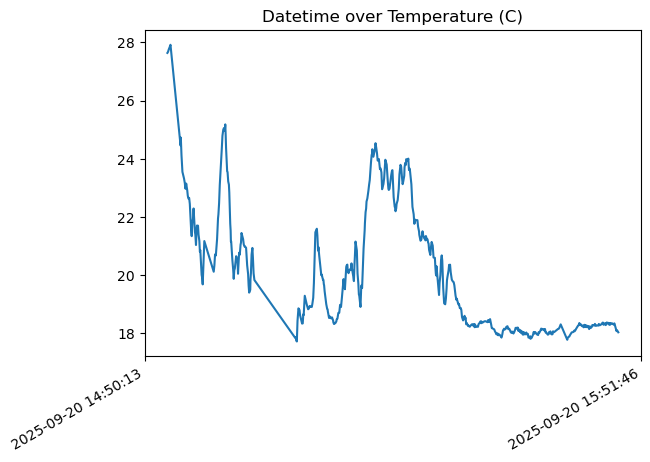

In [11]:
plotter(datetime,temp_c,"Datetime over Temperature (C)")

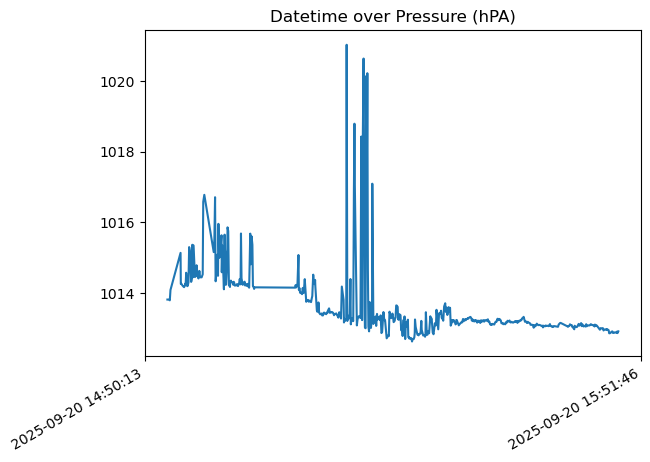

In [12]:
plotter(datetime,p_hpa,"Datetime over Pressure (hPA)")

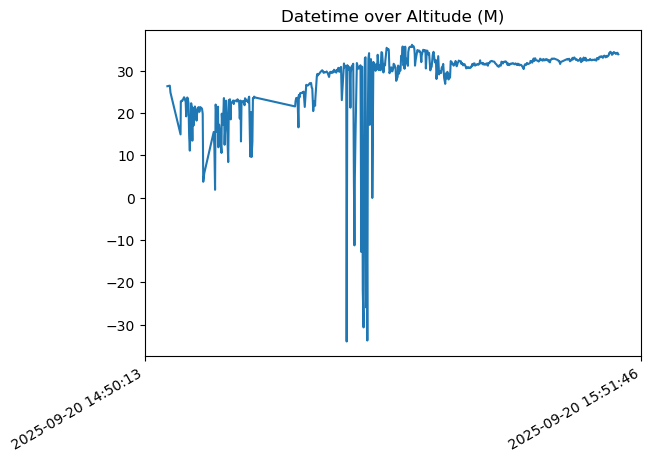

In [13]:
plotter(datetime,alt_m,"Datetime over Altitude (M)")

# CPU Plotting

In [14]:
qry_cpu = con.sql("select * from cpu;")
df_cpu = qry_cpu.df()
df_cpu

,datetime,temperature_c,cpu_load,memory_usage_mb,memory_usage_percent
0,2025-09-20 14:53:02,55.0,0.50,350/1900,18.42
1,2025-09-20 14:53:07,55.0,0.54,350/1900,18.42
2,2025-09-20 14:53:12,57.0,0.58,350/1900,18.42
3,2025-09-20 14:53:19,56.0,0.53,350/1900,18.42
4,2025-09-20 14:53:25,56.0,0.57,350/1900,18.42
...,...,...,...,...,...
560,2025-09-20 15:48:41,48.0,0.58,339/1900,17.84
561,2025-09-20 15:48:47,49.0,0.61,340/1900,17.89
562,2025-09-20 15:48:49,48.0,0.61,342/1900,18.00
563,2025-09-20 15:48:54,48.0,0.56,345/1900,18.16


In [15]:
datetime = df_cpu["datetime"]
temp_c = df_cpu["temperature_c"]
load = df_cpu["cpu_load"]
mb = df_cpu["memory_usage_mb"]
per = df_cpu["memory_usage_percent"]

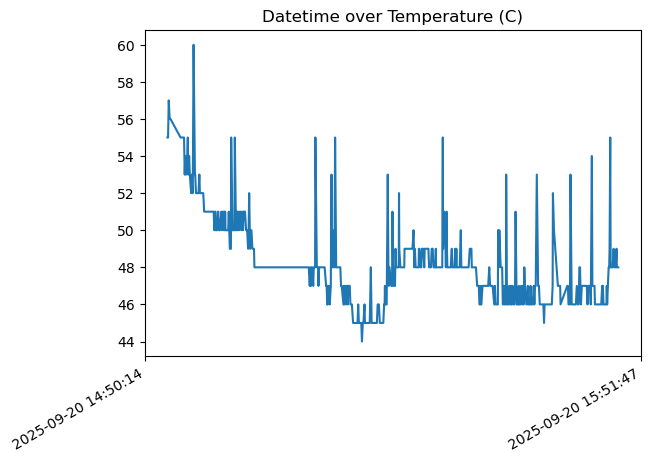

In [16]:
plotter(datetime,temp_c,"Datetime over Temperature (C)")

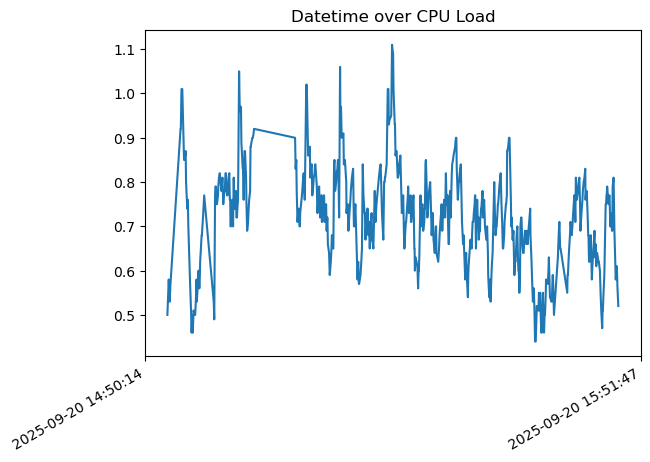

In [17]:
plotter(datetime,load,"Datetime over CPU Load")

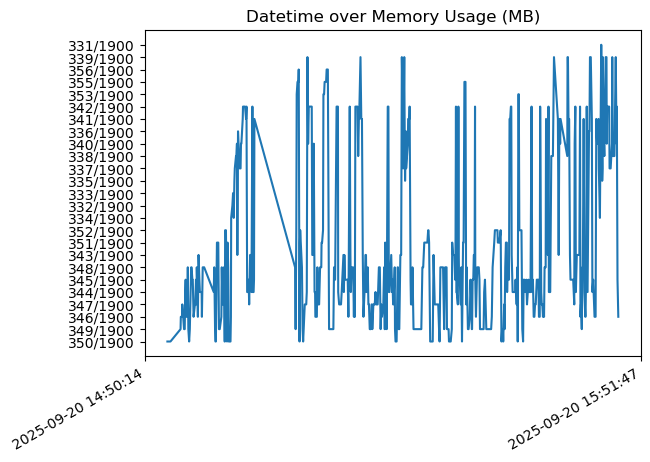

In [18]:
plotter(datetime,mb,"Datetime over Memory Usage (MB)")

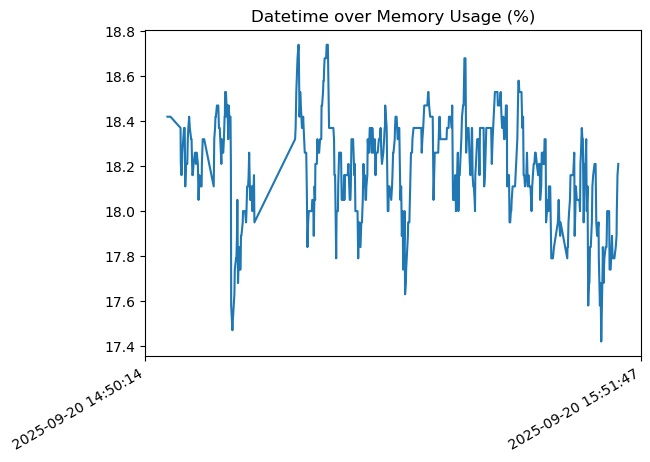

In [19]:
plotter(datetime,per,"Datetime over Memory Usage (%)")